# Mini Projet 2

## Librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer


## Load Data

In [ ]:
df =pd.read_csv('spam.csv', encoding="ISO 8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploratory Data Analysis (EDA):

### Data Cleaning

In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [ ]:
df.columns=['label','message']

In [ ]:
df['label']=df['label'].map({'ham':0 ,'spam':1})

In [ ]:
# dublicate values
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Data Visualization

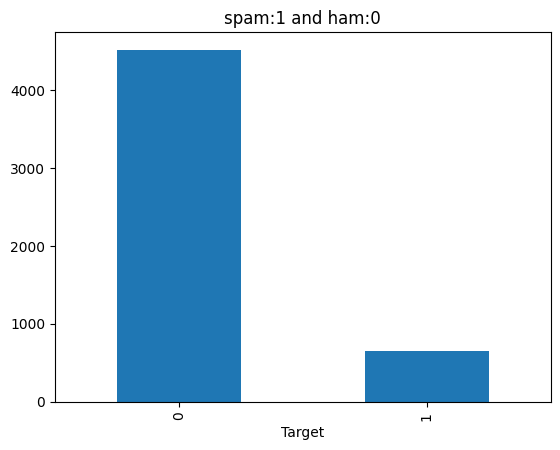

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.title('spam:1 and ham:0')
plt.show()

## Data Splitting

In [ ]:
# dependent /independent variable
X =df.message # independant
y =df.label #dependent

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


## Data vectorisation

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


## Buuiding and Evaluation Model

## naïve bayésienne

In [ ]:

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


predictions = model.predict(X_test_vectorized)


accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9854932301740812
Confusion Matrix:
[[887   2]
 [ 13 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



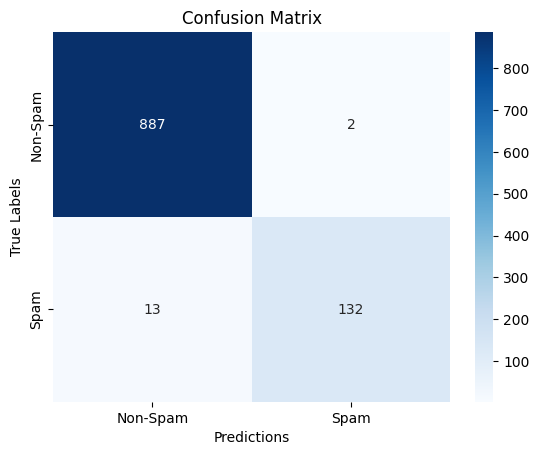

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##  Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Build a Random Forest classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_vectorized)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9787234042553191
Confusion Matrix:
[[888   1]
 [ 21 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



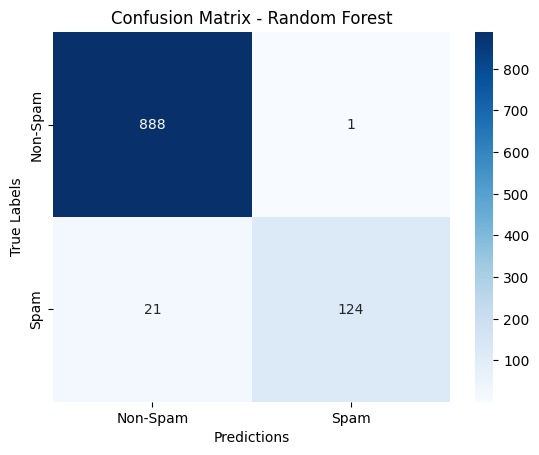

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()
